# Explore here

In [26]:
import pandas as pd

# Lectura del conjunto de datos especificando el delimitador correcto
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
data = pd.read_csv(url, delimiter=';')  # Usar ';' como delimitador para corregir el problema de las columnas

# Imprimir los nombres de las columnas para verificar
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


LIMPIEZA Y DIVISION DE DATOS

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo 'y'
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])  # Transforma 'yes' en 1 y 'no' en 0

# Convertir variables categóricas en variables dummy
data = pd.get_dummies(data, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Alinear X_train y X_test para que ambos tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)  # Rellenar con ceros donde falten valores

ESCALADO 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

ENTRENAMIENTO DEL MODELO

In [30]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logistica
model = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
model.fit(X_train_res, y_train_res)

print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


PREDICCION DEL MODELO

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de confusión:\n", conf_matrix)
print("Reporte de clasificación:\n", class_report)


Precisión del modelo: 0.86
Matriz de confusión:
 [[6300 1003]
 [ 110  825]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7303
           1       0.45      0.88      0.60       935

    accuracy                           0.86      8238
   macro avg       0.72      0.87      0.76      8238
weighted avg       0.92      0.86      0.88      8238



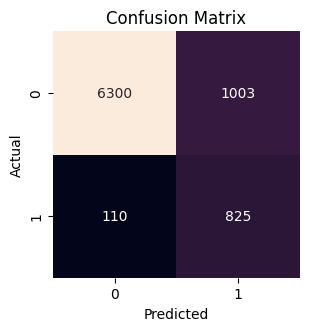

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_df = pd.DataFrame(conf_matrix)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

OPTIMIZACION 

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir el espacio de hiperparámetros para RandomizedSearchCV
random_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l2'], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(model, random_param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, verbose=1)

# Ajustar RandomizedSearchCV
random_search.fit(X_train_res, y_train_res)

# Mejores hiperparámetros y modelo
print("Mejores hiperparámetros:", random_search.best_params_)
best_random_model = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 2.782559402207126}


PRECISION FINAL

In [34]:
from sklearn.metrics import accuracy_score

# Evaluar el modelo de Random Search
y_pred_random = best_random_model.predict(X_test_scaled)
print("Precisión del modelo de Random Search:", accuracy_score(y_test, y_pred_random))

Precisión del modelo de Random Search: 0.864530225782957
